<a href="https://colab.research.google.com/github/MohanVishe/Data-Analysis---Hotel-Booking-/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**Introduction**

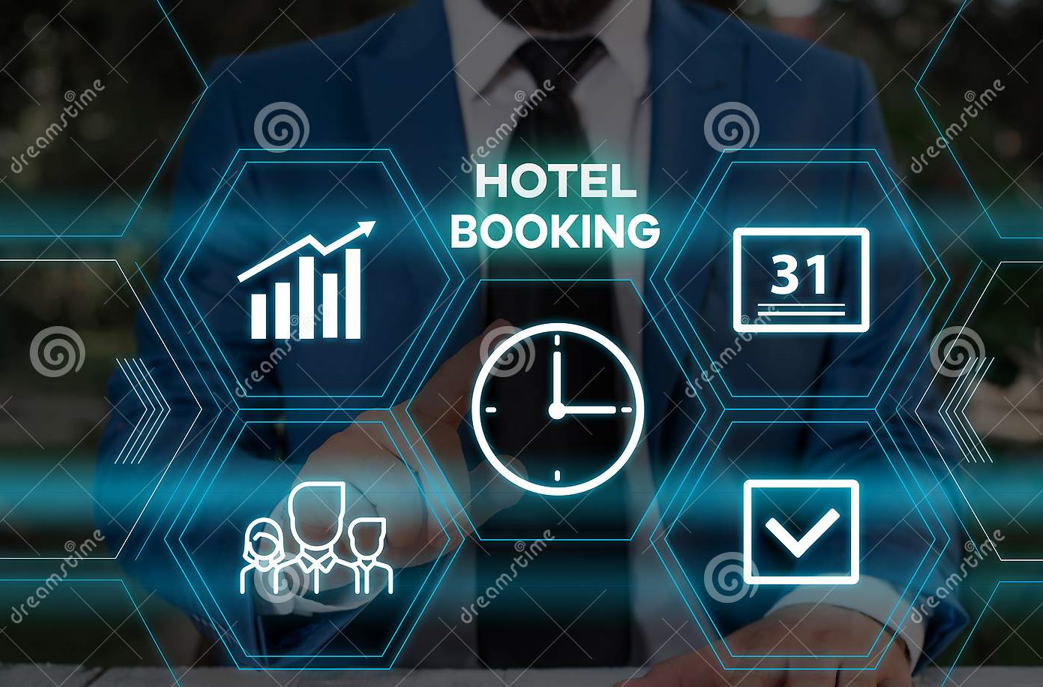

#Introduction


Whenever I think about hotel booking the words that come To mind are money required and my budget, location, services, cleanliness, and facilities. Feels like this are more important than any other while sorting the hotels. Some things are adjustable according to price and some features can be rewarded such as free wifi and breakfast.

The Hotel Booking Dataset gives us information about whether the booking was canceled or not. There are two types of hotels called city hotels and resort hotels which contain booking date and time, number of adults, children, and babies, duration of stay, reservation type, etc


## Features information


##Importing Packages for EDA



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Overview Of data

####Importing Dataset From CSV file into DataFrame

In [3]:
#import csv file to dataframe
HB=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Modules/ Topic/Project/EDA (Hotel Booking)/Hotel Bookings.csv") 

HB.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


*  Dataset has so many feature of different types

### **Information About some Features**

*  **Hotel**
    *  Resort hotel
    *  City hotel
*  **is_canceled**
    *  0 for Not canceled
    *  1 for Canceled
    
*  **lead_time** : Number of days between date of 
     booking property management system and arrival date
*  **arrival_date_year**: year of arrival from 2015 to 2017
*  **arrival_date_month**:Month of arrival from Jan to Dec
*  **arrival_date_week_number**:Week number of year from 1 to 53
*  **arrival_date_day_of_month**:Day of arrival date
*  **stays_in_weekend_nights**:Number of Sat/Sun stayed or booked to stay at the hotel
*  **stays_in_week_nights**:Number of Mon to Fri  stayed or booked to stay at the hotel
*  **meal**:type of meal booked
    *  Undefined or SC - no meal package
    *  BB - Bed and Breakfast
    *  HB – Half board 
    *  FB – Full board
*  **market_segment**:Group of people who share one or more common characteristics, lumped together for marketing purposes
    * TA for Travel Agents
    * TO for Tour operators

*  **distribution_channel**:Chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer
    * TA for Travel Agents
    * TO for Tour operators
*  **is_repeated_guest**:Is the booking name was from repeated guest
    *  0 for Yes
    *  1 for No
* **previous_cancellations**:Number of previous bookings that cancelled by customer prior to the current booking
*  **previous_bookings_not_canceled**:Number of previous bookings that not cancelled by customer prior to the current booking
*  **reservation_status_date**:Date at which  last status was set 
*  **reservation_status**:
    *  Canceled for booking was canceled
    *  Check-Out for customer has checked in but departed
    *  No-Show for customer did not check-in and did inform the hotel of reason why
*  **agent**:ID of the travel agency which made  booking
*  **company**:ID is presented instead of designation for anonymity reasons
*  *** **customer_type**:
    *  Group when the booking is associated to a group
    *  Transient when the booking is not part of a group
    *  Contract when the booking has an allotment/ other type of contract
    *  Transient-party when the booking is transient, but is associated to at least other transient booking





#### lets see some information about Dataset

In [6]:
HB.shape

(119390, 32)

In [4]:
HB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

####INFERENCE
*  Hotel Booking dataset has 32 features/columns and 119390 rows
*  There are columns with null/missing values and the Data types of features are differ so we have To do data Pre Processing

##**Data Pre-Processing**:
Data pre-processing is important part of EDA as it makes data more clean and
Visualization become easy.

In [17]:
df=HB.copy()

###1. **Handling Missing/Null values**

Text(0, 0.5, 'features')

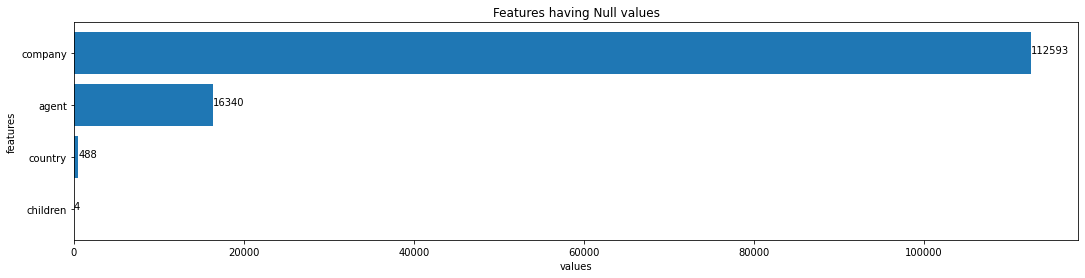

In [96]:
plt.rcParams["figure.figsize"]=[18,4]

a=[]
b=[] 
#filter out columns with null values
for i in HB.columns:
  if HB[i].isnull().sum()!=0:
    a.append(i)
    b.append(HB[i].isnull().sum())
#As there are columns with low values we have  to print number for detail information
plt.barh(a,b)
for index, value in enumerate(b):
  plt.text(value, index,
  str(value))
plt.title("Features having Null values")
plt.xlabel("values")
plt.ylabel('features')

*  There are only four columns with missing values where country and children have fewer missing values
*  Agent and company have considerable missing values but if we go to remove that much number of rows we can lose much data. As they are not that important feature ignore them.


In [18]:
# Remove columns company and agent
df=df.drop(columns=["company","agent"])

# for Null children value, replace with rounded median value
df['children'].fillna(round(HB.children.median()), inplace=True)

# Remove rows containing missing contry values
df = df.dropna(axis = 0)

**Finally We have Dataset with no null or missing Values**

### 2. Handling Datatypes:
As the number of childern should be integer we should convert float to integer

In [19]:
## converting datatype from float to integer
df["children"]=df["children"].astype("int32")

#** Exploratory Data Analysis**

## For analysis lets find answer to  Questions.

### 1.  Give Information about bookings in both type of hotels

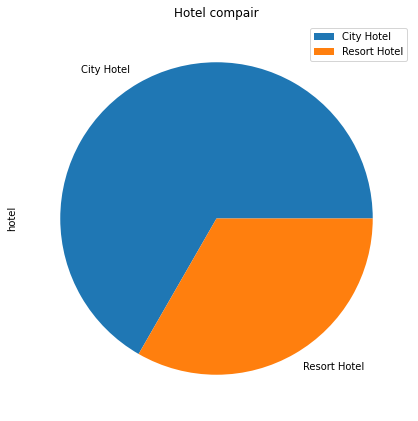

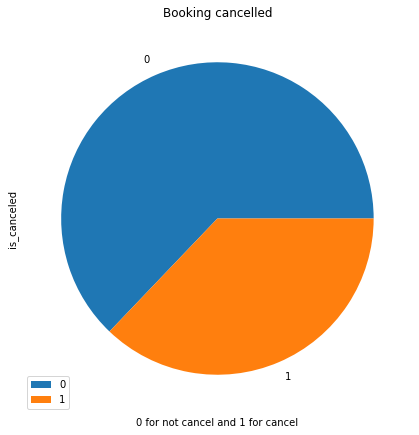

In [56]:
plt.rcParams["figure.figsize"]=[7,8]
(df["hotel"].value_counts()).plot.pie()
plt.title("Hotel compair");plt.legend();plt.show()
(df["is_canceled"].value_counts()).plot.pie();plt.legend()
plt.title("Booking cancelled");plt.xlabel("0 for not cancel and 1 for cancel");plt.legend();plt.show()

####INFERENCE
*  City hotels have a higher number of bookings than a resort hotel
*  The cancel rate is high we can see that more than 1/3 of bookings were canceled which is not good.

### 2. find booking for each year seperated by hotel type

*For Analysis we have to select booking which are not get cancelled*

In [37]:
Non_cancel=df[df.is_canceled==0]

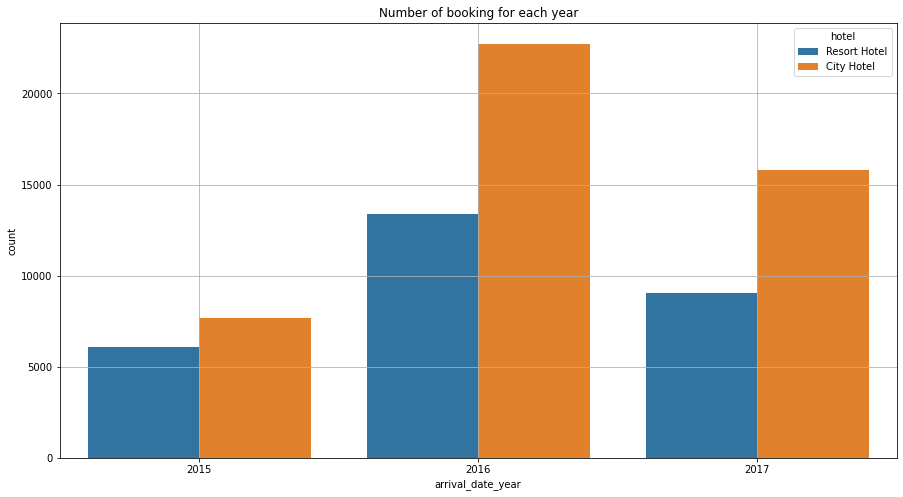

In [53]:
plt.rcParams["figure.figsize"]=[15,8]
sns.countplot(x="arrival_date_year",data=Non_cancel,hue="hotel")
plt.title("Number of booking for each year")
plt.grid()
plt.show()

####INFERENCE
*  for 2015 the booking where less than 10000 where for year 2016 booking where at pick crossing 22500
*  There is higher junp in city hotel booking as compair to resort hotel
 

###3. How much time do people stay in a particular hotel?

In [45]:
Non_cancel["total_stay"]=Non_cancel["stays_in_weekend_nights"]+Non_cancel["stays_in_week_nights"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


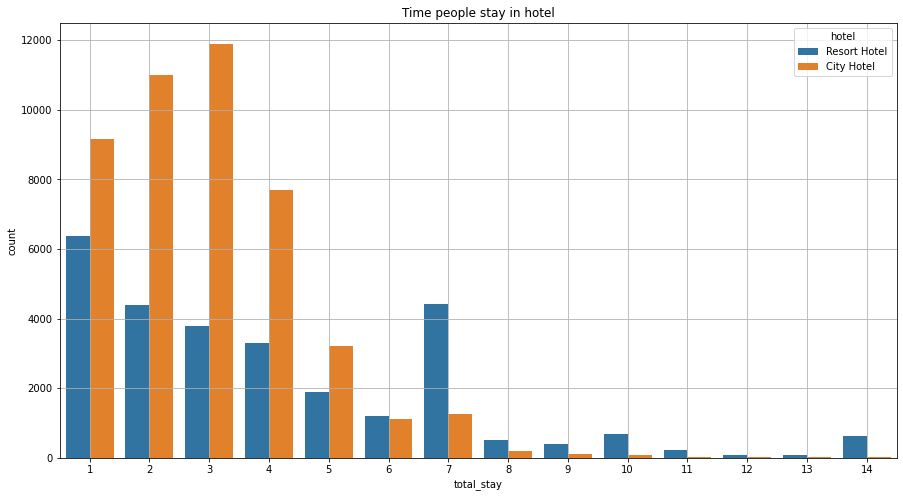

In [60]:
 # remove outliers
T = Non_cancel[(Non_cancel["total_stay"]>0) & (Non_cancel['total_stay'] < 15)]
plt.rcParams["figure.figsize"]=[15,8]
sns.countplot(x = T['total_stay'], hue = T['hotel'])
plt.title("Time people stay in hotel");plt.grid();plt.show()

####INFERENCE
*  City hotel shows pick for 3 days stay which is around 12000 and the maximum number of people stay below 5 days
*  For Resort hotels show a decrease in number as days increase but for a week or 2-week stay there is a considerable increase in count.
*  For day 1 Resort hotels show pick which is greater than 6000.


###4. The total number of people staying in a particular hotel and their frequency

In [51]:
Non_cancel["People"]=Non_cancel["adults"]+Non_cancel["children"]+Non_cancel["babies"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


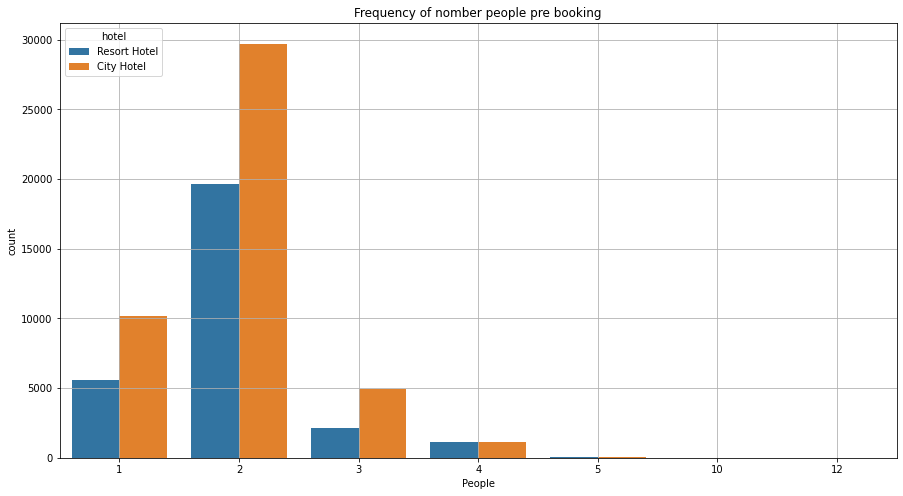

In [63]:
plt.rcParams["figure.figsize"]=[15,8]
# Remove outliers
P=Non_cancel[Non_cancel["People"]>0]
sns.countplot(x =P['People'], hue = P['hotel'])
plt.title("Frequency of nomber people pre booking");plt.grid();plt.show()


####INFERENCE
*  Maximum bookings has two people where single person booking also has a high count
*  After the number of people increases the frequency of booking exponentially decreases

###5. Average daily rate per person per month for a particular hotel.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[]

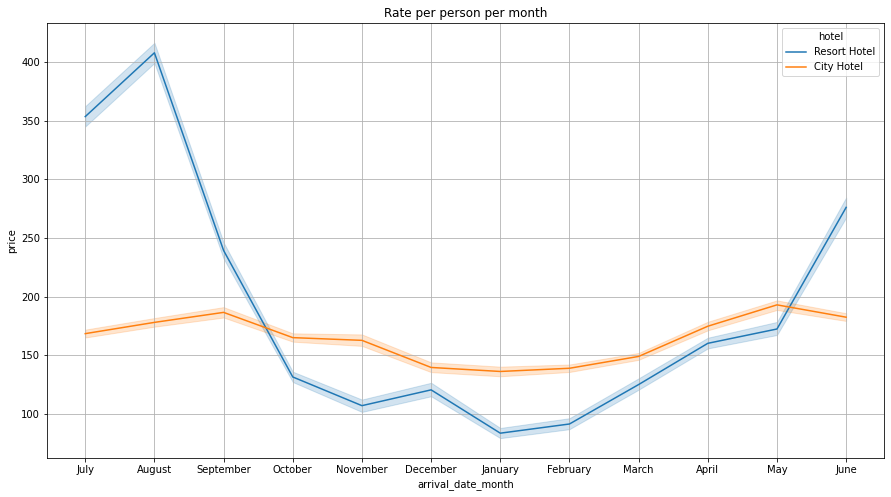

In [77]:
Non_cancel["ADR/Person"]=Non_cancel["adr"]/(Non_cancel["adults"]+Non_cancel["children"])
Non_cancel["price"]=Non_cancel["ADR/Person"]*(Non_cancel["total_stay"])
sns.lineplot(data=Non_cancel,x="arrival_date_month",y="price",hue="hotel")
plt.grid();plt.title("Rate per person per month")
plt.plot()



####INFERENCE
*  City hotel rates are much more volatile as compared to Resort hotel
*  For August price is at its pick greater than 400 where lowest in January it seems below 100


###6. Create Correlation Matrix for important numerical feature

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

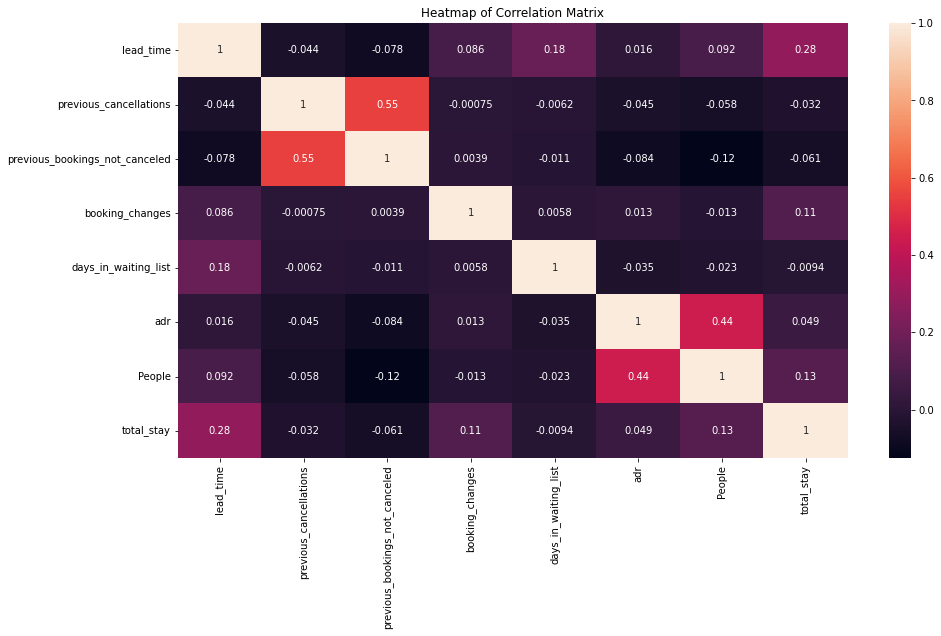

In [80]:
#list of important numerical features
lst=['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr',"People","total_stay"]
#correlation matrix
CM=Non_cancel[lst].corr()
sns.heatmap(CM,annot=True)
plt.title("Heatmap of Correlation Matrix")

####INFERENCE
*  'ADR' is correlated with people as number of people increases earnings increase and so does ADR.
*  Total_stay is correlated with lead_time means loger stays has plan long time before arrival
